In [1]:
# loading the libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the new cuustomer list datas, one with missing values and the other which is clean
ncm = pd.read_excel("New_Customer_List_Missing.xlsx")

ncc = pd.read_excel("New_Customer_List_Clean.xlsx")

ncm.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Dukie      Swire    Male                                   88   
1       Otis      Ottey    Male                                   26   
2   Tabbatha    Averill  Female                                    5   
3     Rourke   Gillbard    Male                                   11   
4      Rhona  De Freyne  Female                                   45   

         DOB                   job_title job_industry_category  \
0 1954-03-31                         NaN         Manufacturing   
1 1998-02-05            Quality Engineer                   NaN   
2 1977-12-17  Quality Control Specialist                   NaN   
3 1945-08-03                         NaN              Property   
4 1960-11-22                         NaN                Health   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0  Affluent Customer                  N      Yes  ...    NSW  Australia   
1      Mass Customer                  N       No  ...    QLD  Australia   
2  Affluent Customer                  N      Yes  ...    NSW  Australia   
3      Mass Customer                  N       No  ...    QLD  Australia   
4     High Net Worth                  N       No  ...    VIC  Australia   

   property_valuation Unnamed: 16 Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0                   8        0.70       0.875      1.09375      1.09375   
1                   4        0.50       0.500      0.50000      0.42500   
2                   8        0.72       0.900      0.90000      0.90000   
3                   4        0.47       0.470      0.47000      0.39950   
4                  10        0.44       0.440      0.55000      0.55000   

   Unnamed: 20  Rank     Value  
0           16    16  1.562500  
1           23    23  1.500000  
2           23    23  1.500000  
3           26    26  1.468750  
4           30    30  1.460938  

[5 rows x 23 columns]

In [3]:
# exploring the data
ncm.shape

(265, 23)

In [4]:
ncm.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Unnamed: 16                                   float64
Unnamed: 17                                   float64
Unnamed: 18                 

In [5]:
ncm.isnull().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [6]:
ncm1 = ncm.copy()

In [7]:
ncm.shape

(265, 23)

### DATA IMPUTATION

In [8]:
ncm.job_title.fillna("Undefined", inplace = True)
ncm.job_industry_category.fillna("Undefined", inplace = True)

In [9]:
# Concatenate the two DataFrames vertically
full_ncl = pd.concat([ncc,ncm])

# Reset the index of the merged DataFrame
full_ncl = full_ncl.reset_index(drop=True)

# summary stats of the full new customer list
full_ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            1000 non-null   object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            1000 non-null   object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [10]:
#getting the age of the new clients by subtracting the today date from there date of birth
from datetime import date

today = date.today()

today_timestamp = pd.Timestamp(today)

full_ncl["DOB"] = pd.to_datetime(full_ncl["DOB"])

full_ncl["age"] = (today_timestamp - full_ncl["DOB"]).astype('<m8[Y]')

In [11]:
# defining the classes and specifying there bategories
age_ranges =[(18,29,"A"),(30,39,"B"),(40,49,"C"),(50,59,"D"),(60,69,"E"),(70,79,"F"),(80,110,"G")]

# creating the function to map the discrete ages into classes
def range_func(age):
    for range_start,range_end,age_class in age_ranges:
        if range_start <= age <= range_end:
            return age_class
    return "Unknown"

# creating a new column to hold the classes of age
full_ncl["age_class"] = full_ncl["age"].map(range_func)

In [12]:
# getting the summary statistics on all numerical columns
full_ncl.describe()

past_3_years_bike_related_purchases       tenure     postcode  \
count                          1000.000000  1000.000000  1000.000000   
mean                             49.836000    11.388000  3019.227000   
std                              27.796686     5.037145   848.895767   
min                               0.000000     0.000000  2000.000000   
25%                              26.750000     7.000000  2209.000000   
50%                              51.000000    11.000000  2800.000000   
75%                              72.000000    15.000000  3845.500000   
max                              99.000000    22.000000  4879.000000   

       property_valuation  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
count         1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean             7.397000     0.743510     0.834160     0.937918     0.866594   
std              2.758804     0.205267     0.247541     0.296063     0.282754   
min              1.000000     0.400000     0.400000     0.400000     0.340000   
25%              6.000000     0.570000     0.620000     0.690000     0.637500   
50%              8.000000     0.740000     0.820000     0.925000     0.839375   
75%              9.000000     0.920000     1.012500     1.137500     1.051875   
max             12.000000     1.100000     1.375000     1.718750     1.718750   

       Unnamed: 20         Rank        Value         age  
count  1000.000000  1000.000000  1000.000000  983.000000  
mean    498.819000   498.819000     0.881714   51.611394  
std     288.810997   288.810997     0.293525   17.055067  
min       1.000000     1.000000     0.340000   21.000000  
25%     250.000000   250.000000     0.649531   40.000000  
50%     500.000000   500.000000     0.860000   51.000000  
75%     750.250000   750.250000     1.075000   65.000000  
max    1000.000000  1000.000000     1.718750   84.000000

In [13]:
# filling all the null values in the age dataset with the mean
mean = int(full_ncl.age.mean())

full_ncl.age.fillna(mean, inplace = True)

In [14]:
full_ncl.nunique()

first_name                              940
last_name                               962
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               185
job_industry_category                    10
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             131
Unnamed: 18                             187
Unnamed: 19                             329
Unnamed: 20                             324
Rank                                    324
Value                           

In [16]:
# re-arranging the columns in my preffered order
new_column_order = ['first_name', 'last_name', 'gender',"age_class", 'DOB', 'age',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value', 'today']

full_ncl = full_ncl.reindex(columns = new_column_order)

full_ncl_vis = full_ncl.copy()

full_ncl_vis.head()

full_ncl_vis.to_excel("New_Cust_Tabl_kpmg.xlsx", index = True)

# dropping columns that are now considerd duplicate and unuseefull
full_nncl = full_ncl.drop(["DOB", 'deceased_indicator', 'country', "today", "address"], axis =1)

#Having an un preprocessed copy of the full_ncl data for visualizations
ncl_vis = full_nncl.copy()

# dropping age column
full_ncl = full_ncl.drop(["first_name", "last_name","DOB", 'deceased_indicator', 'country', "today","age", "address"], axis =1)

In [17]:
full_ncl_vis.head()

first_name  last_name  gender age_class        DOB   age  \
0    Chickie    Brister    Male         E 1957-07-12  65.0   
1      Morly     Genery    Male         D 1970-03-22  53.0   
2    Ardelis  Forrester  Female         C 1974-08-28  48.0   
3     Lucine      Stutt  Female         C 1979-01-28  44.0   
4    Melinda     Hadlee  Female         D 1965-09-21  57.0   

   past_3_years_bike_related_purchases                   job_title  \
0                                   86             General Manager   
1                                   69         Structural Engineer   
2                                   10      Senior Cost Accountant   
3                                   64  Account Representative III   
4                                   34           Financial Analyst   

  job_industry_category     wealth_segment  ...    country property_valuation  \
0         Manufacturing      Mass Customer  ...  Australia                  6   
1              Property      Mass Customer  ...  Australia                 11   
2    Financial Services  Affluent Customer  ...  Australia                  5   
3         Manufacturing  Affluent Customer  ...  Australia                  1   
4    Financial Services  Affluent Customer  ...  Australia                  9   

   Unnamed: 16 Unnamed: 17  Unnamed: 18 Unnamed: 19 Unnamed: 20  Rank  \
0         0.48        0.60         0.75      0.6375           1     1   
1         0.44        0.44         0.55      0.4675           1     1   
2         0.82        0.82         0.82      0.8200           1     1   
3         0.40        0.50         0.50      0.5000           4     4   
4         0.72        0.72         0.90      0.9000           4     4   

      Value  today  
0  1.718750    NaN  
1  1.718750    NaN  
2  1.718750    NaN  
3  1.703125    NaN  
4  1.703125    NaN  

[5 rows x 26 columns]

In [18]:
# having an overview of the new data dataset
full_ncl.sample(10)

gender age_class  past_3_years_bike_related_purchases  \
235    Male         A                                   64   
81   Female         C                                   21   
625  Female         G                                   67   
989  Female         E                                   74   
877  Female         B                                   56   
67   Female         A                                   30   
898    Male         A                                   75   
468  Female         A                                   98   
873    Male         A                                    4   
547    Male         A                                   22   

                         job_title job_industry_category     wealth_segment  \
235                      Librarian         Entertainment      Mass Customer   
81                Junior Executive    Financial Services     High Net Worth   
625  Human Resources Assistant III                Health  Affluent Customer   
989                      Undefined         Manufacturing      Mass Customer   
877              Assistant Manager             Undefined      Mass Customer   
67    Structural Analysis Engineer         Manufacturing     High Net Worth   
898                Data Coordiator             Undefined      Mass Customer   
468    Mechanical Systems Engineer                Retail      Mass Customer   
873        Human Resources Manager             Undefined     High Net Worth   
547         Senior Sales Associate    Financial Services  Affluent Customer   

    owns_car  tenure  postcode state  property_valuation  Unnamed: 16  \
235      Yes       7      3013   VIC                   8         0.94   
81       Yes       6      3094   VIC                   9         0.68   
625      Yes      22      2088   NSW                   9         0.44   
989      Yes      15      2038   NSW                  11         1.00   
877       No       6      2160   NSW                   9         0.49   
67       Yes      14      3173   VIC                   8         0.51   
898      Yes      13      3133   VIC                   8         0.48   
468      Yes       1      3178   VIC                   9         0.58   
873      Yes       6      3630   VIC                   1         0.64   
547      Yes       6      3174   VIC                   6         0.98   

     Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Rank     Value  
235       1.1750      1.17500     0.998750          329   329  1.000000  
81        0.8500      1.06250     1.062500          114   114  1.275000  
625       0.5500      0.68750     0.687500          856   856  0.560000  
989       1.2500      1.56250     1.328125          954   954  0.450000  
877       0.4900      0.61250     0.520625          498   498  0.860625  
67        0.6375      0.63750     0.637500           99    99  1.296875  
898       0.6000      0.60000     0.510000          575   575  0.796875  
468       0.7250      0.90625     0.770312          653   653  0.718750  
873       0.8000      0.80000     0.800000          486   486  0.875000  
547       1.2250      1.22500     1.225000          755   755  0.640000

### VISUALIZATION

In [19]:
# getting all numerical and categorical statistics of the ncl_vis data
ncl_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   age_class                            1000 non-null   object 
 4   age                                  1000 non-null   float64
 5   past_3_years_bike_related_purchases  1000 non-null   int64  
 6   job_title                            1000 non-null   object 
 7   job_industry_category                1000 non-null   object 
 8   wealth_segment                       1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  postcode                       

In [20]:
ncl_vis.sample(15)

first_name   last_name  gender age_class   age  \
639  Marie-jeanne    Breawood  Female         E  69.0   
843        Giulia      Hazart  Female         C  44.0   
570          Rafi   Brettelle    Male         E  66.0   
506        Mandie     MacAdie  Female         C  48.0   
600      Rodrique      Vernon    Male         C  44.0   
148        Tannie    Gambrell    Male         D  56.0   
694       Chryste      Oddboy  Female         B  34.0   
136      Maurizio        Comi    Male         A  26.0   
920         Shane        Diss  Female         C  42.0   
351          Dawn       Pyffe  Female         D  58.0   
522       Brendis     Pineaux    Male         C  45.0   
527       Halette       Borsi  Female         E  61.0   
852          Nora      Anselm  Female         E  62.0   
487         Wylie  Huntingdon    Male         D  56.0   
110          Bill         Doe  Female         E  60.0   

     past_3_years_bike_related_purchases                      job_title  \
639                                   37            Clinical Specialist   
843                                   57           Help Desk Technician   
570                                   89                       Operator   
506                                   39          Chief Design Engineer   
600                                   70  Budget/Accounting Analyst III   
148                                   92              Financial Analyst   
694                                   44          Software Engineer III   
136                                   74          VP Product Management   
920                                   50                      Undefined   
351                                   56              Media Manager III   
522                                   12    Mechanical Systems Engineer   
527                                   60                 Research Nurse   
852                                   84                      Undefined   
487                                   99             VP Quality Control   
110                                   74   Human Resources Assistant II   

    job_industry_category     wealth_segment owns_car  ...  postcode  state  \
639                Health     High Net Worth       No  ...      2770    NSW   
843             Undefined      Mass Customer       No  ...      4218    QLD   
570                Health     High Net Worth       No  ...      2166    NSW   
506    Telecommunications     High Net Worth       No  ...      2110    NSW   
600         Manufacturing  Affluent Customer       No  ...      3174    VIC   
148    Financial Services  Affluent Customer       No  ...      4710    QLD   
694         Manufacturing     High Net Worth      Yes  ...      2320    NSW   
136                    IT  Affluent Customer       No  ...      2766    NSW   
920    Financial Services     High Net Worth      Yes  ...      3198    VIC   
351                Retail      Mass Customer       No  ...      3155    VIC   
522         Manufacturing      Mass Customer       No  ...      2560    NSW   
527                Health  Affluent Customer      Yes  ...      2128    NSW   
852         Entertainment     High Net Worth      Yes  ...      4342    QLD   
487    Financial Services      Mass Customer       No  ...      2763    NSW   
110              Property      Mass Customer      Yes  ...      2170    NSW   

    property_valuation  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
639                  6         1.01       1.0100     1.010000     1.010000   
843                 11         0.56       0.5600     0.700000     0.595000   
570                 10         1.00       1.0000     1.250000     1.250000   
506                 11         0.87       0.8700     1.087500     1.087500   
600                  8         0.58       0.5800     0.580000     0.580000   
148                  4         0.83       0.8300     1.037500     1.037500   
694                  9         0.71       0.8875     1.109375     1.109375   
136 

In [21]:
full_ncl.corr().style.background_gradient(cmap = "seismic_r", vmin=-1, vmax=1)

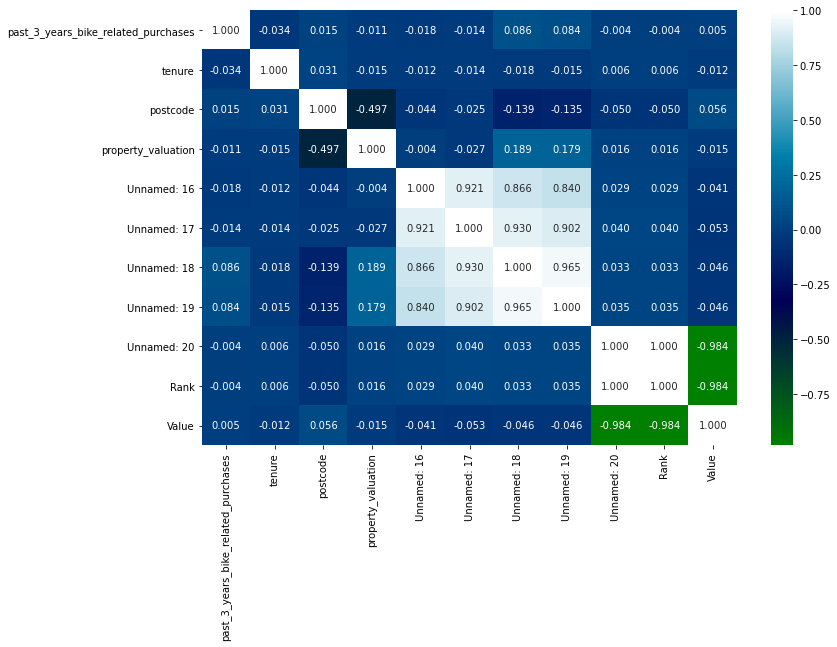

In [22]:
plt.figure(figsize=(12,8))

heatmap = sns.heatmap(full_ncl.corr(), cmap = 'ocean', annot=True, fmt=".3F")

### Univariate Analysis

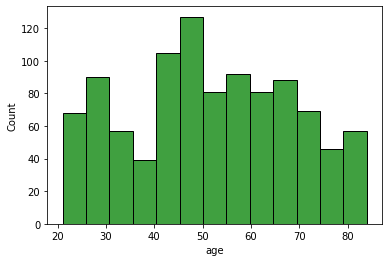

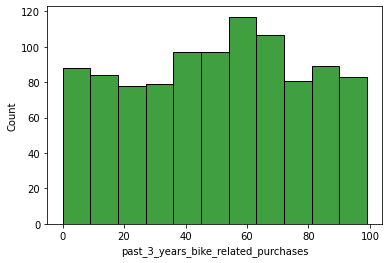

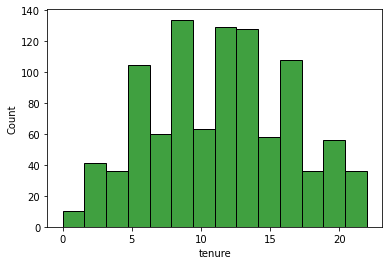

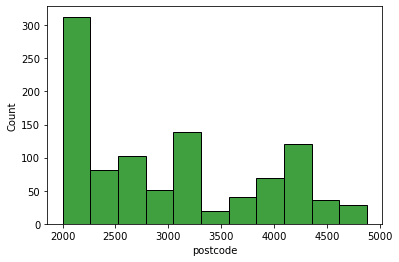

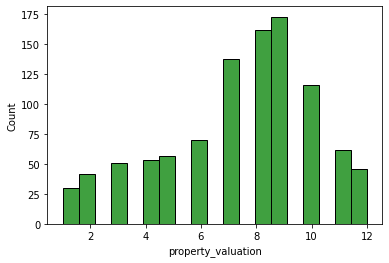

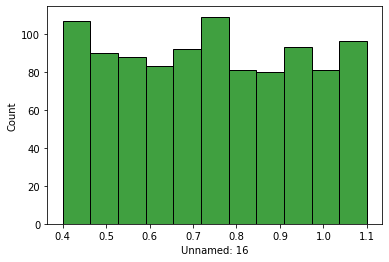

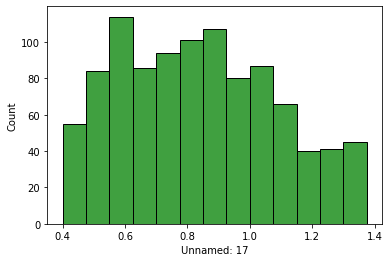

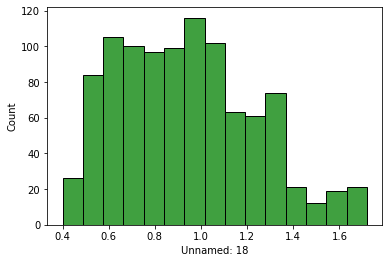

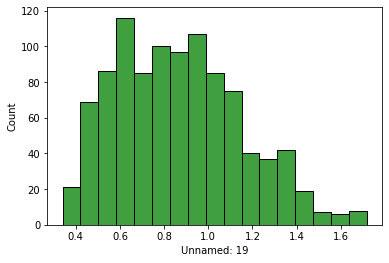

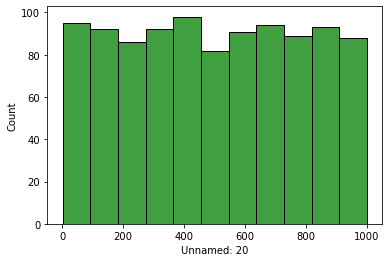

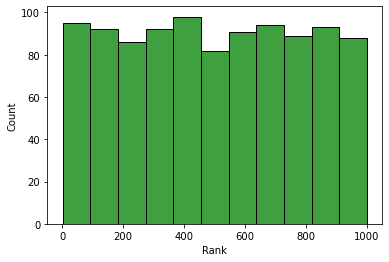

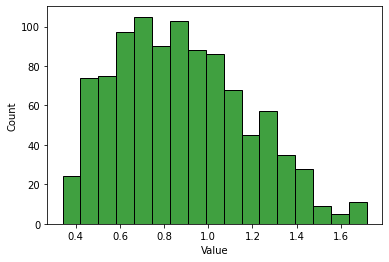

In [40]:
for i in ncl_vis.columns:
    if ncl_vis[i].dtypes != "object":
        sns.histplot(x = ncl_vis[i], color = "green")
        plt.show()

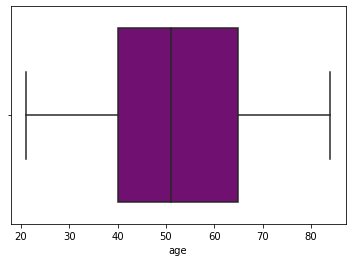

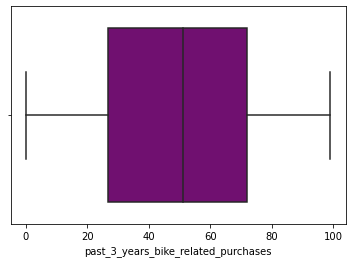

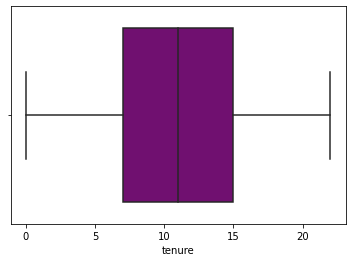

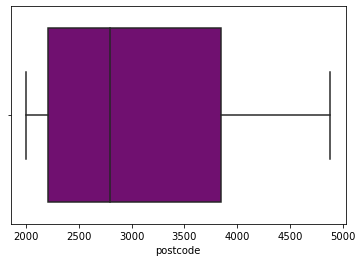

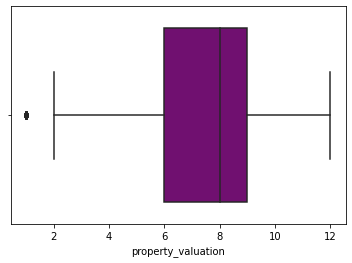

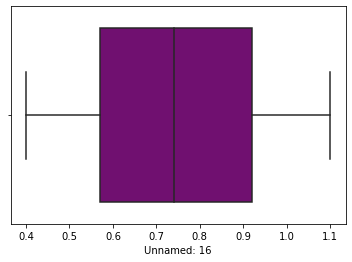

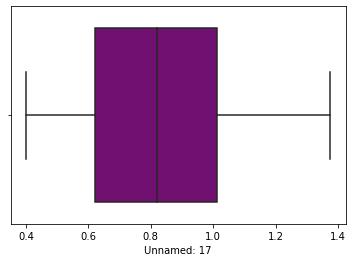

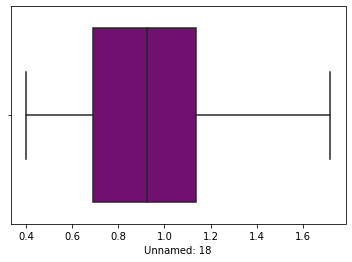

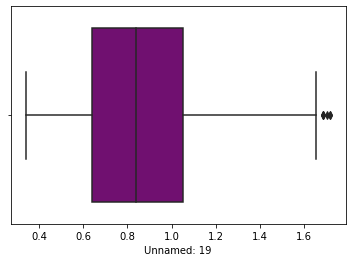

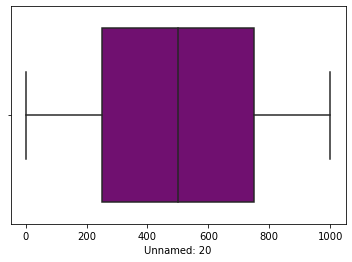

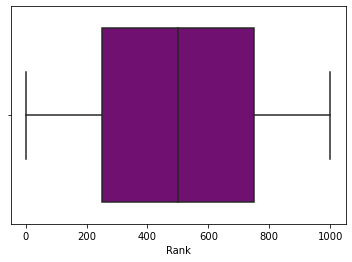

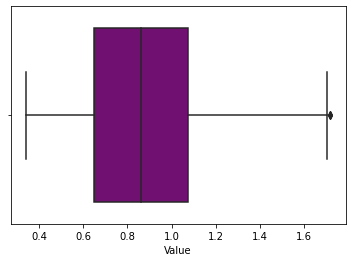

In [42]:
for i in ncl_vis.columns:
    if ncl_vis[i].dtypes != "object":
        sns.boxplot(x = ncl_vis[i], color = "purple")
        plt.show()

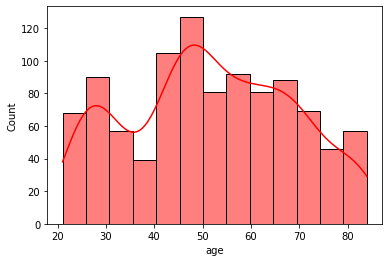

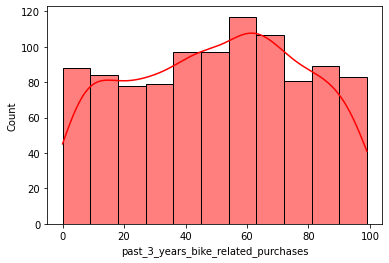

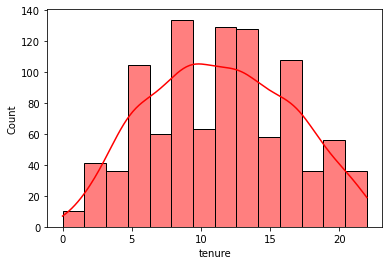

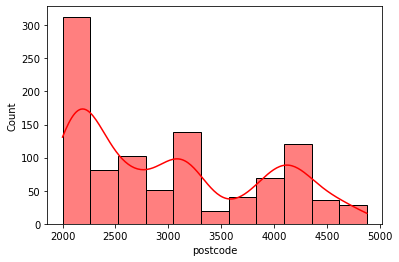

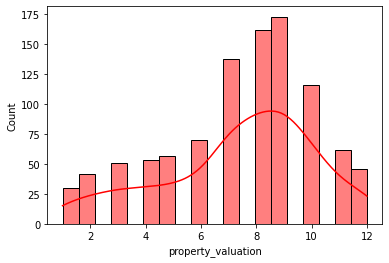

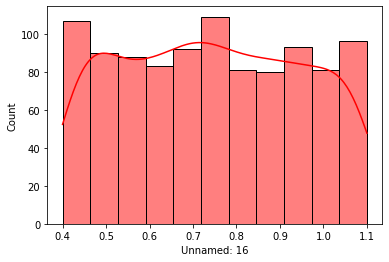

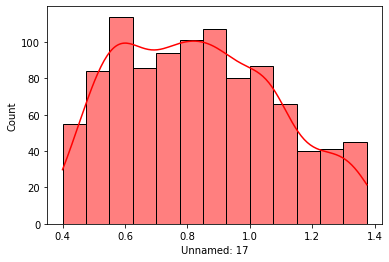

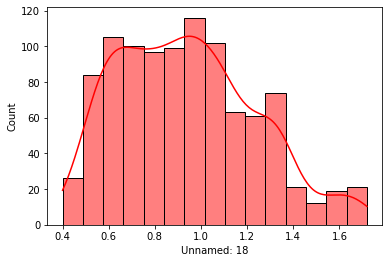

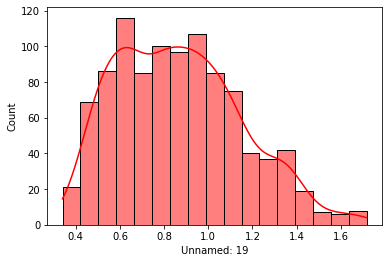

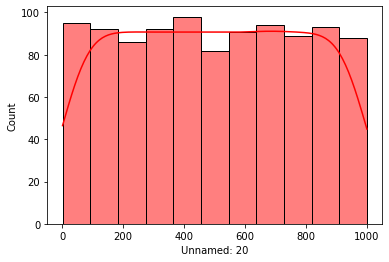

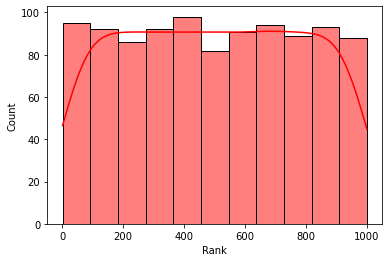

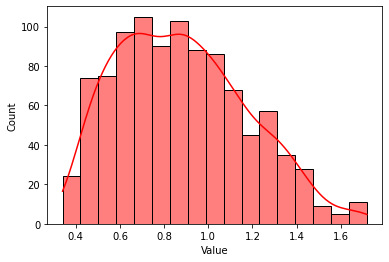

In [45]:
for i in ncl_vis.columns:
    if ncl_vis[i].dtypes != "object":
        sns.histplot(x = ncl_vis[i],kde = True, color = "red")
        plt.show()

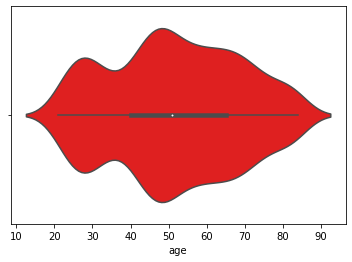

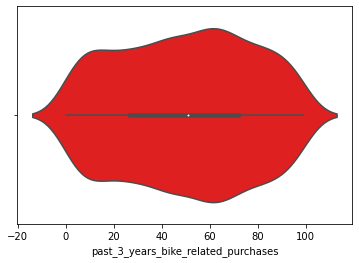

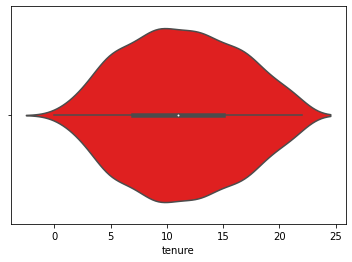

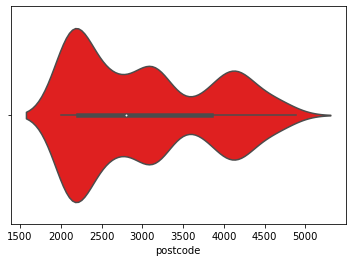

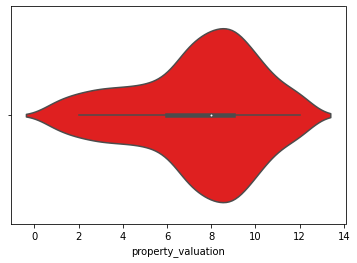

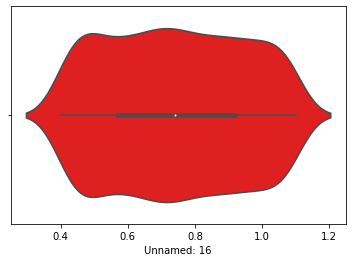

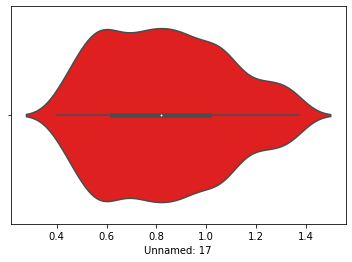

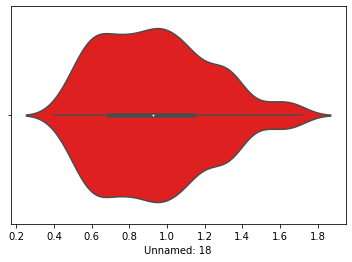

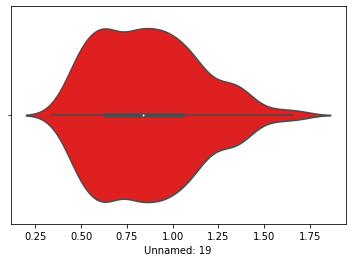

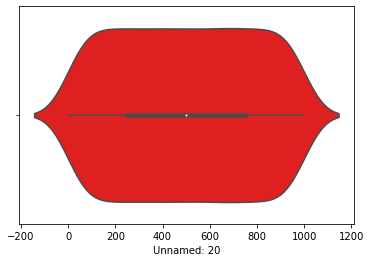

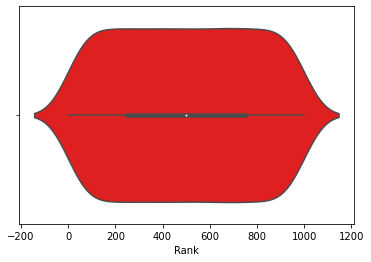

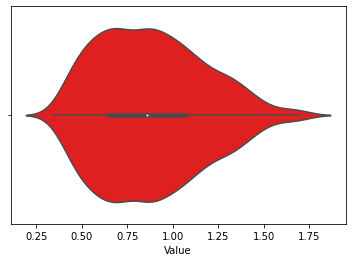

In [46]:
for i in ncl_vis.columns:
    if ncl_vis[i].dtypes != "object":
        sns.violinplot(x = ncl_vis[i], color = "red")
        plt.show()

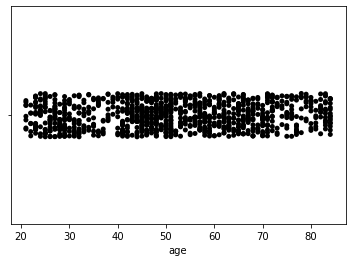

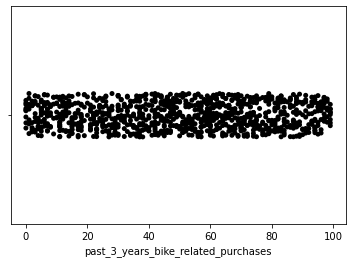

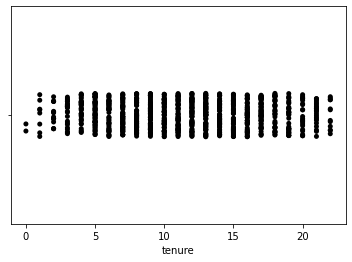

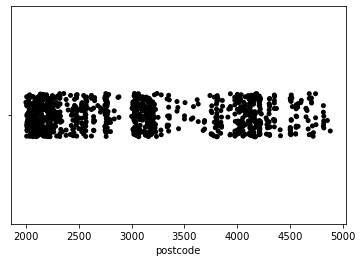

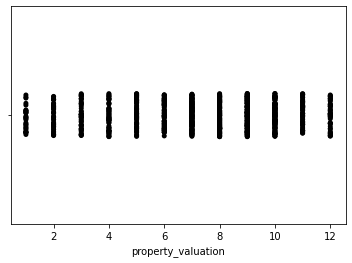

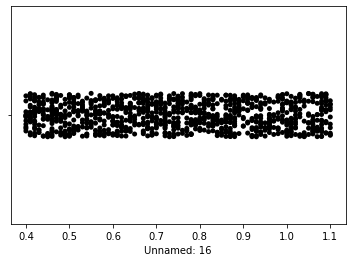

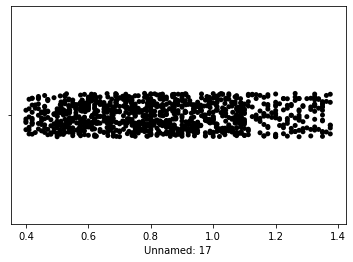

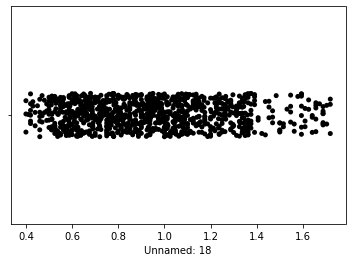

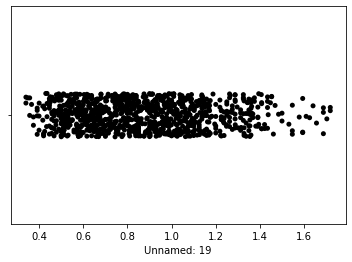

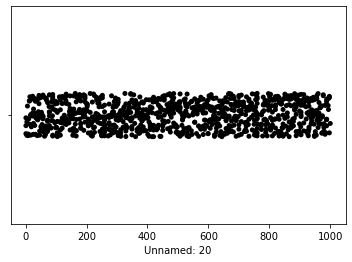

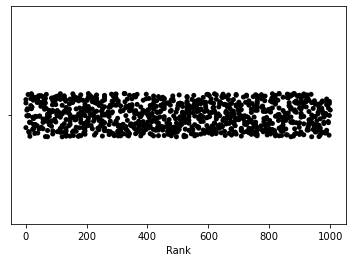

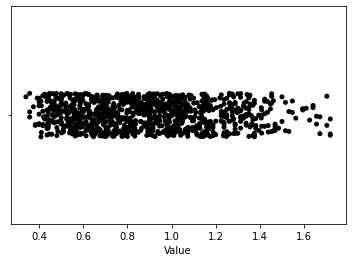

In [47]:
for i in ncl_vis.columns:
    if ncl_vis[i].dtypes != "object":
        sns.stripplot(x = ncl_vis[i], color = "black")
        plt.show()

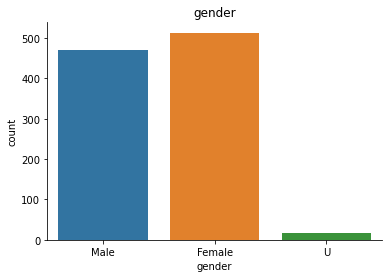

In [23]:
# create a count plot for gender
sns.countplot(ncl_vis['gender'])
plt.title('gender')
sns.despine()

In [24]:
ncl_vis.columns

Index(['first_name', 'last_name', 'gender', 'age_class', 'age',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'postcode', 'state', 'property_valuation', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [25]:
columns = ['gender', 'age_class', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',  'state', 'property_valuation'][1:]

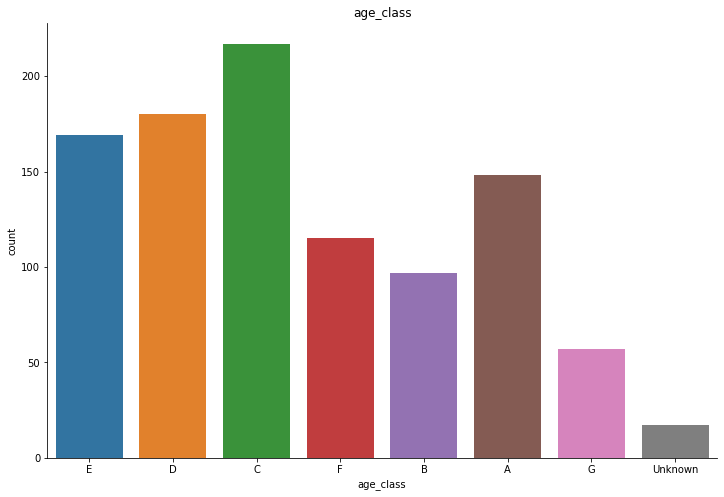

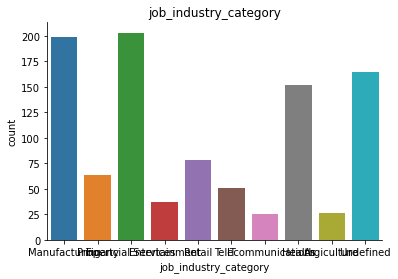

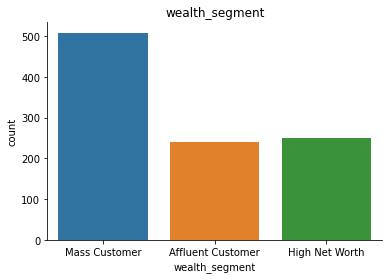

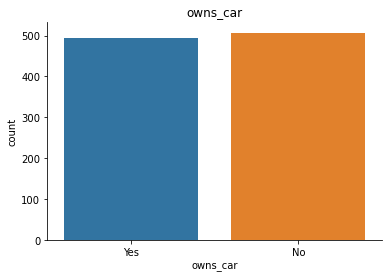

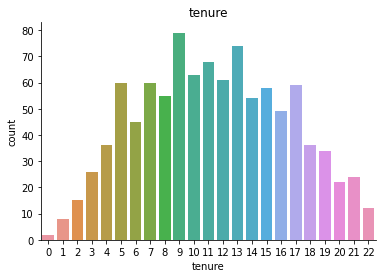

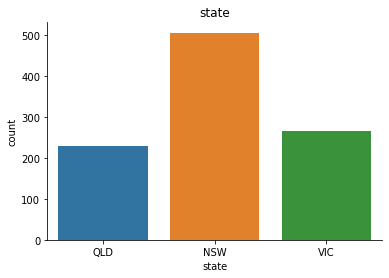

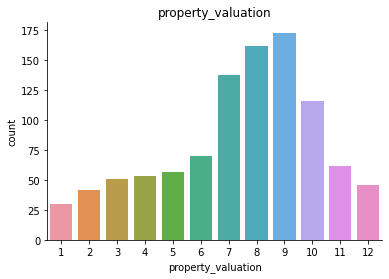

In [26]:
plt.figure(figsize=(12,8))

for column in columns:
    sns.countplot(ncl_vis[column])
    plt.title(column)
    sns.despine()
    plt.show()

In [27]:
# top job title with the top modes excluding the undefined titles
top_titles = ncl_vis["job_title"].value_counts()[:10][1:]
top_titles

Associate Professor        15
Software Consultant        14
Environmental Tech         14
Chief Design Engineer      13
Cost Accountant            12
Assistant Media Planner    12
Senior Sales Associate     12
VP Sales                   12
Assistant Manager          12
Name: job_title, dtype: int64

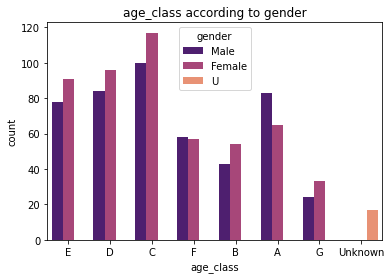

<Figure size 864x576 with 0 Axes>

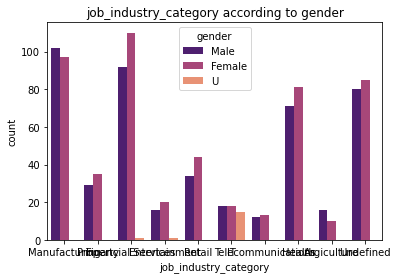

<Figure size 864x576 with 0 Axes>

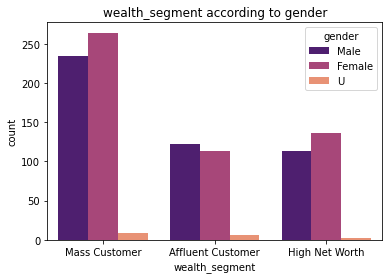

<Figure size 864x576 with 0 Axes>

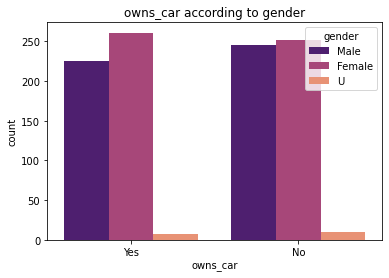

<Figure size 864x576 with 0 Axes>

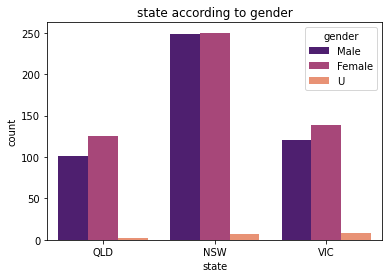

<Figure size 864x576 with 0 Axes>

In [28]:

columns = ["gender",'age_class', 'job_industry_category', 'wealth_segment', 'owns_car', 'state'][1:]

for column in columns:
    sns.countplot(x=column, hue='gender', data= ncl_vis, palette='magma').set(title= column + " according to " + hue)
    plt.figure(figsize=(12,8))
    sns.despine()
    plt.show()

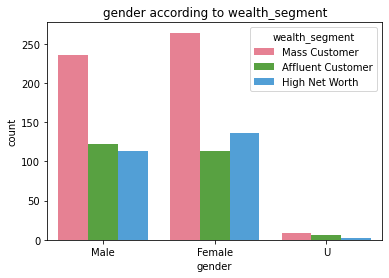

<Figure size 864x576 with 0 Axes>

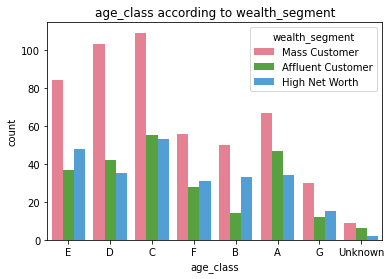

<Figure size 864x576 with 0 Axes>

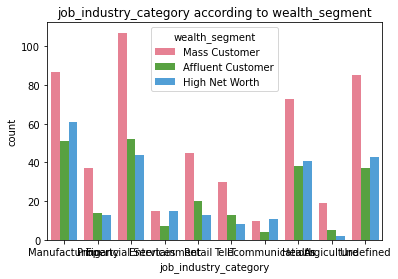

<Figure size 864x576 with 0 Axes>

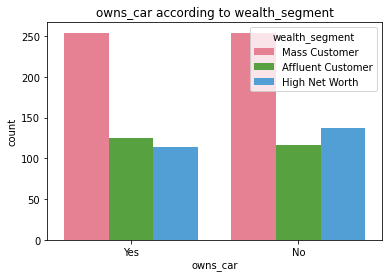

<Figure size 864x576 with 0 Axes>

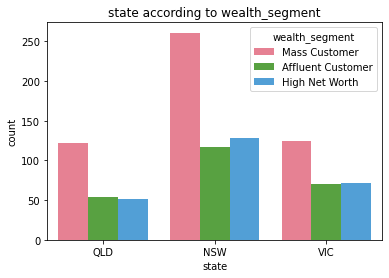

<Figure size 864x576 with 0 Axes>

In [29]:
columns = ['wealth_segment', "gender", 'age_class', 'job_industry_category', 'owns_car', 'state'][1:]
hue ="wealth_segment"

for column in columns:
    sns.countplot(x=column, hue ='wealth_segment', data= ncl_vis, palette='husl').set(title= column + " according to " + hue)
    plt.figure(figsize=(12,8))
    sns.despine()
    plt.show()

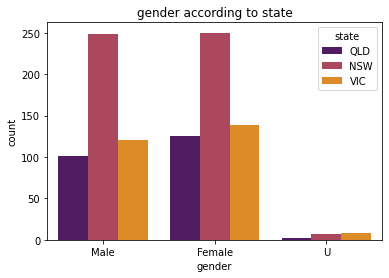

<Figure size 864x576 with 0 Axes>

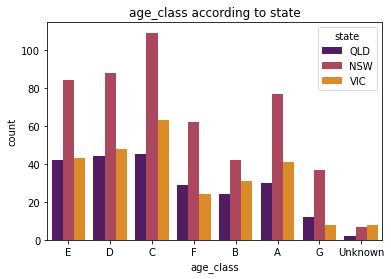

<Figure size 864x576 with 0 Axes>

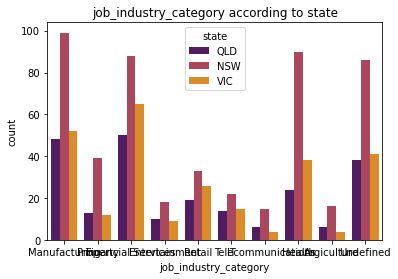

<Figure size 864x576 with 0 Axes>

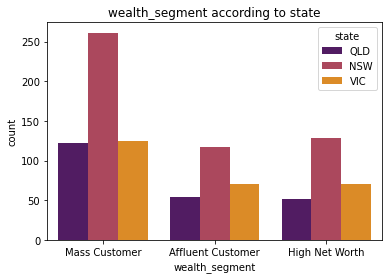

<Figure size 864x576 with 0 Axes>

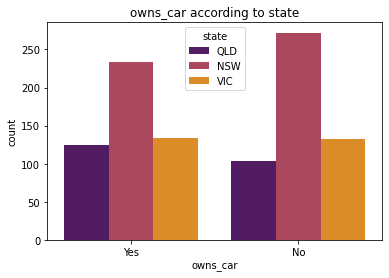

<Figure size 864x576 with 0 Axes>

In [30]:
columns = ['state', "gender", 'age_class', 'job_industry_category', 'wealth_segment', 'owns_car', ][1:]
hue='state'

for column in columns:
    sns.countplot(x=column, hue='state', data= ncl_vis, palette='inferno').set(title= column + " according to " + hue)
    plt.figure(figsize=(12,8))
    sns.despine()
    plt.show()

<Figure size 864x576 with 0 Axes>

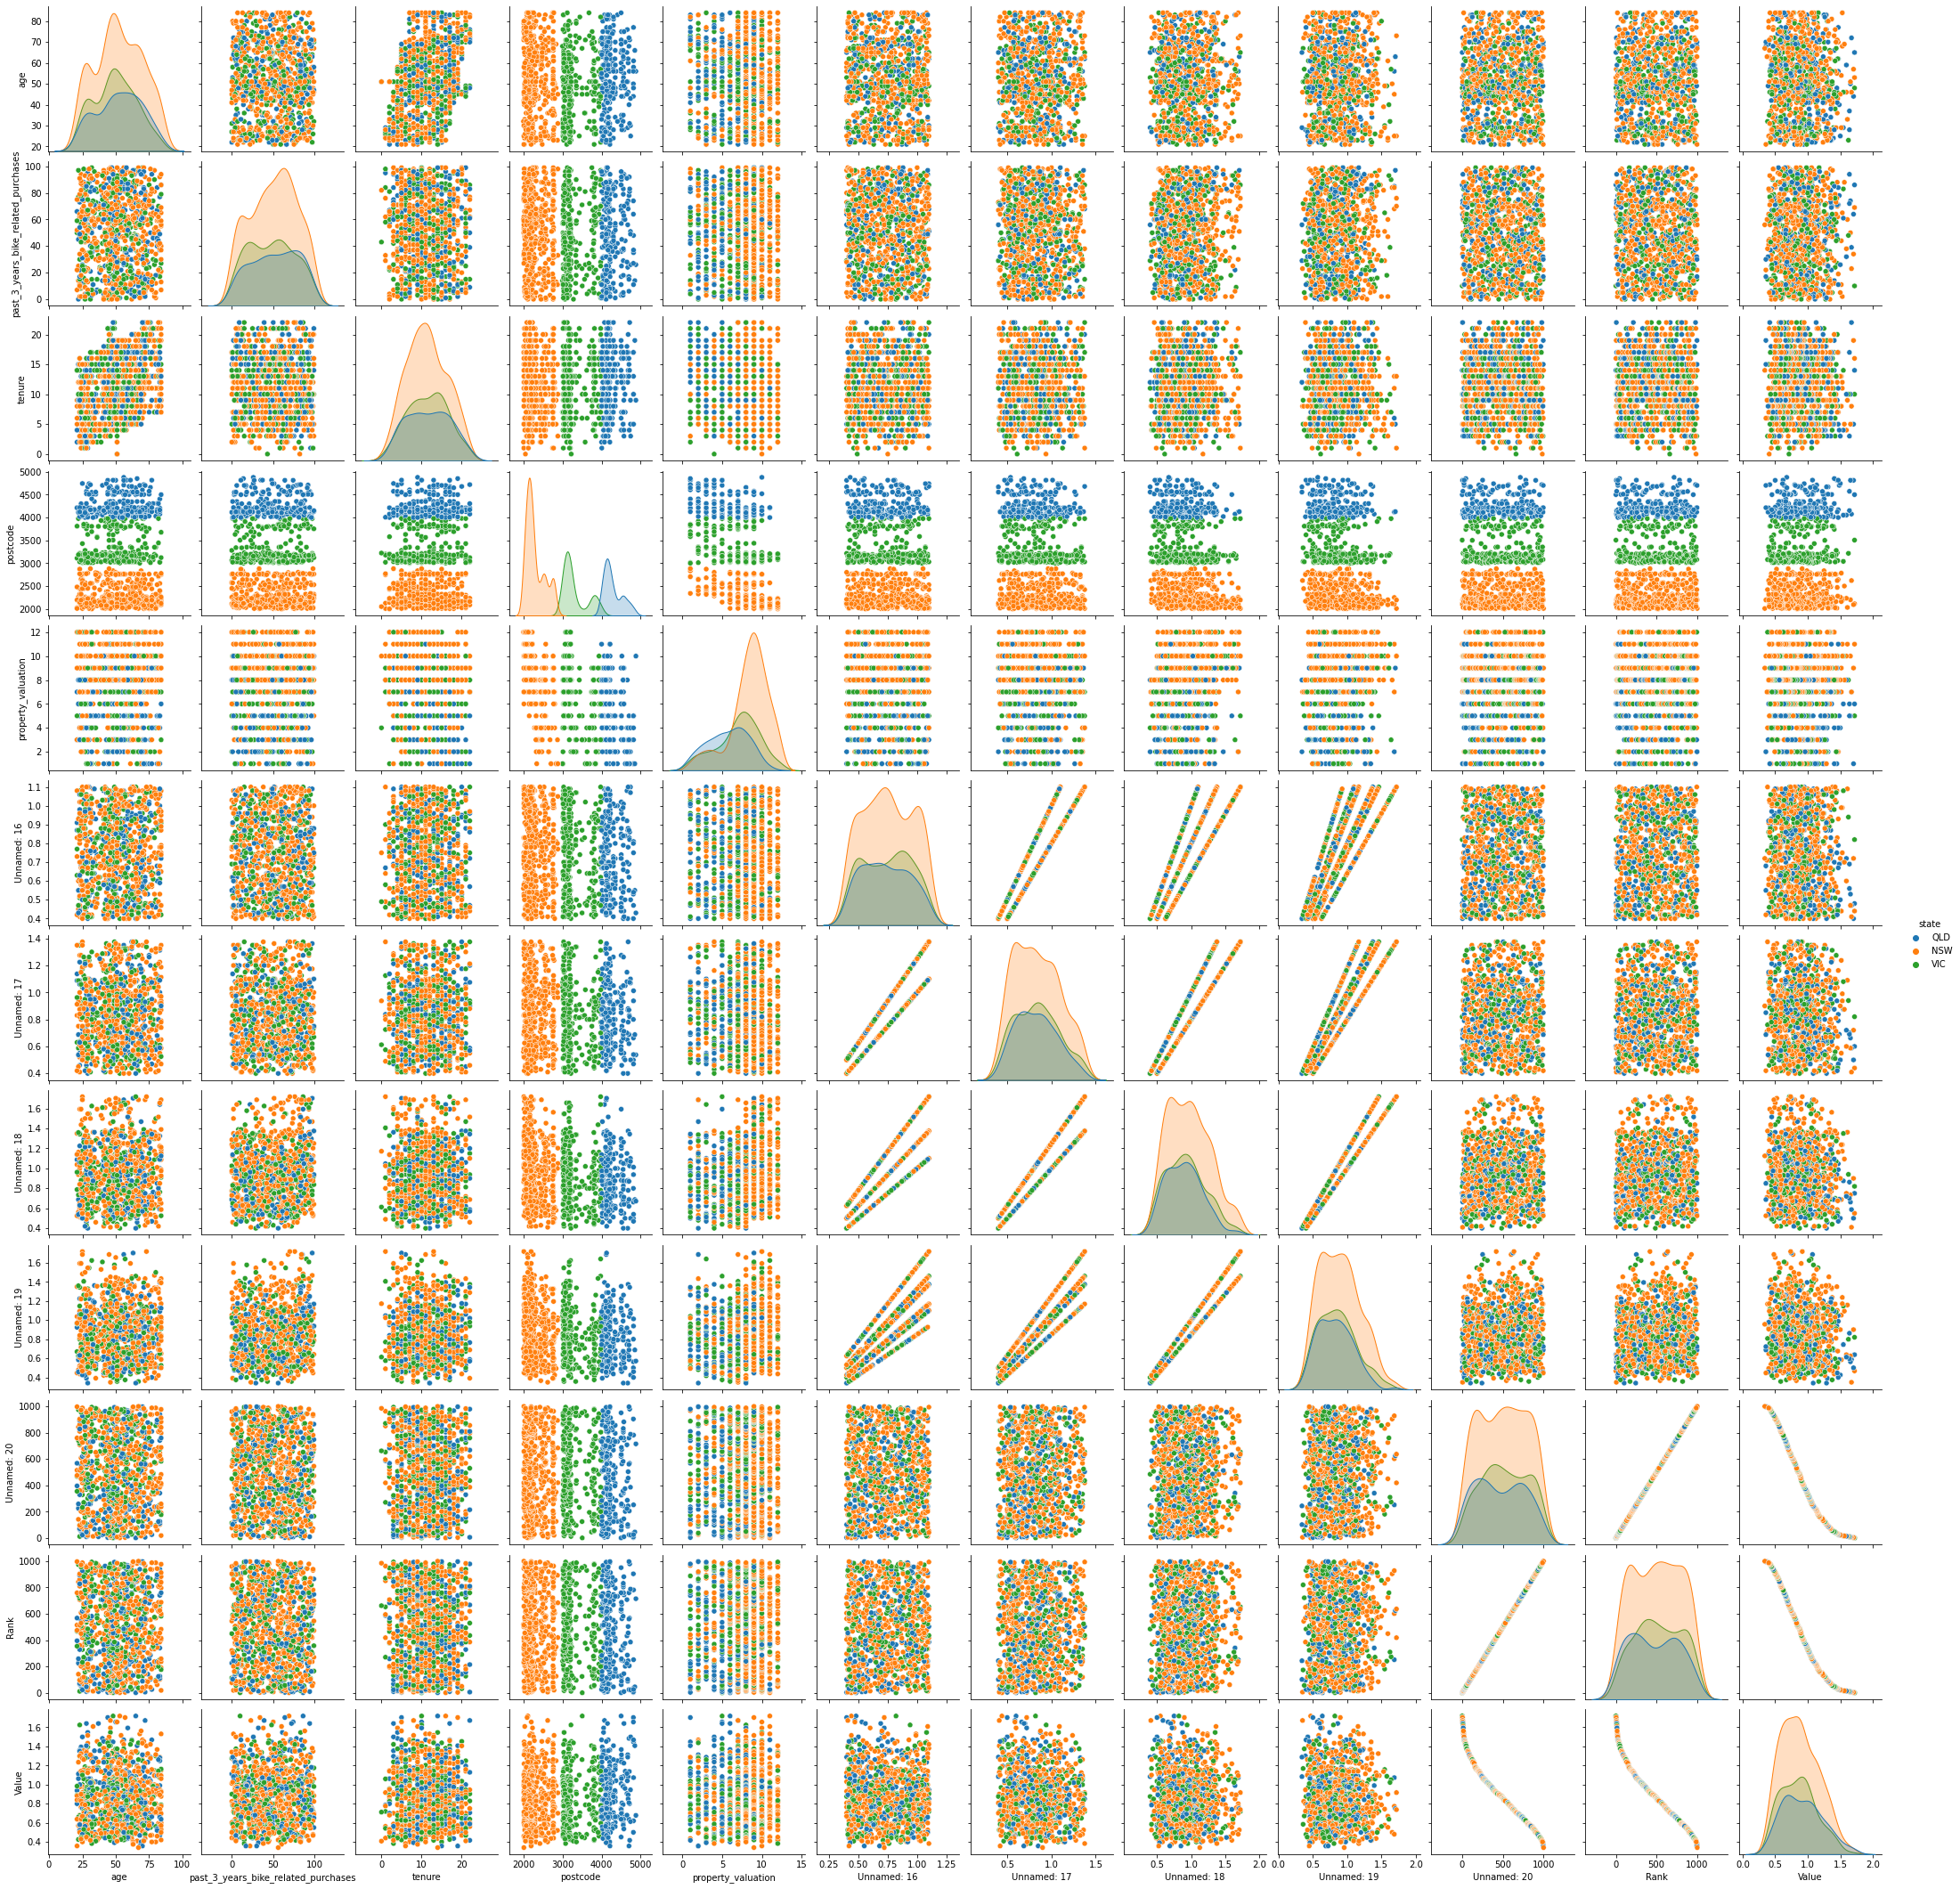

In [31]:
plt.figure(figsize=(12,8))
sns.pairplot(ncl_vis, hue = "state")

### PREPROCESSING

In [32]:
#loading the preprocessing module in the console
from sklearn.preprocessing import LabelEncoder

In [33]:
# actualizing the preprocessing using the nodule loaded
encoder = LabelEncoder()

for column in full_ncl.columns:
        if full_ncl[column].dtype == "object":
            full_ncl[column] = encoder.fit_transform(full_ncl[column])
            
full_ncl.sample(8)     

gender  age_class  past_3_years_bike_related_purchases  job_title  \
171       1          4                                   29         90   
153       1          0                                   11         91   
672       0          1                                   59        110   
114       0          0                                   23         78   
414       1          2                                   33        144   
724       0          6                                   64        123   
961       1          5                                    7        124   
476       1          4                                   94        170   

     job_industry_category  wealth_segment  owns_car  tenure  postcode  state  \
171                      3               2         0      12      4556      1   
153                      5               2         0       4      2125      0   
672                      3               2         0      16      2071      0   
114                      3               2         1      10      3109      2   
414                      2               1         1       9      2160      0   
724                      5               2         1      11      2322      0   
961                      9               2         1      13      3105      2   
476                      5               0         1      20      2766      0   

     property_valuation  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
171                   8         0.40       0.4000     0.400000     0.340000   
153                  11         0.41       0.4100     0.512500     0.435625   
672                   9         0.94       0.9400     1.175000     0.998750   
114                  11         0.58       0.7250     0.906250     0.770312   
414                   9         0.93       1.1625     1.453125     1.453125   
724                   7         0.91       1.1375     1.137500     0.966875   
961                  10         0.84       1.0500     1.312500     1.115625   
476                   8         0.64       0.8000     1.000000     1.000000   

     Unnamed: 20  Rank     Value  
171          244   244  1.083750  
153          215   215  1.128906  
672          921   921  0.490000  
114          158   158  1.187500  
414          575   575  0.796875  
724          988   988  0.399500  
961          838   838  0.573750  
476          662   662  0.711875

In [34]:
ready_ncl = full_ncl.copy()

### Machine Learnig Models

### Supervised Models

In [35]:
# importing the supervised classification modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def evaluate_classification_models(data, labels):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    
    # Initialize the classifiers
    classifiers = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        SVC()
    ]
    
    # Train and evaluate each classifier
    for classifier in classifiers:
        classifier_name = classifier.__class__.__name__
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"Classifier: {classifier_name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print("------------------------")


In [36]:
# using the function on our data
data = ready_ncl.drop("wealth_segment", axis = 1)

labels = ready_ncl["wealth_segment"]

evaluate_classification_models(data, labels)

Classifier: LogisticRegression
Accuracy: 0.4750
Precision: 0.2268
Recall: 0.4750
F1-score: 0.3070
------------------------
Classifier: DecisionTreeClassifier
Accuracy: 0.7000
Precision: 0.6976
Recall: 0.7000
F1-score: 0.6987
------------------------
Classifier: RandomForestClassifier
Accuracy: 0.6250
Precision: 0.5793
Recall: 0.6250
F1-score: 0.5771
------------------------
Classifier: SVC
Accuracy: 0.4750
Precision: 0.2256
Recall: 0.4750
F1-score: 0.3059
------------------------


### Unsupervised Models

In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

<AxesSubplot:>

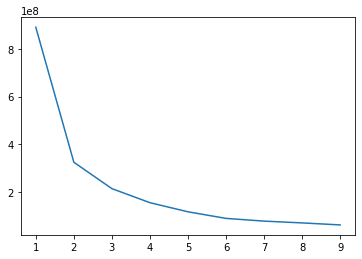

In [38]:
# finding the optimum cluster
clusters = np.arange(1,10,1)
inertias = []

for cluster in clusters:
    #instantiate Kmeans
    kmeans = KMeans(n_clusters=cluster)
    
    # fit on our data
    kmeans.fit(ready_ncl)
    
    # append the inertia to inertias
    inertias.append(kmeans.inertia_)
    
# plot line plot
sns.lineplot(x=clusters, y= inertias)

In [39]:

# K-Means
kmeans = KMeans(n_clusters=3)  # Specify the desired number of clusters
kmeans.fit(ready_ncl)
kmeans_labels = kmeans.labels_
kmeans_unique_labels = np.unique(kmeans_labels)
if len(kmeans_unique_labels) > 1:
    kmeans_silhouette = silhouette_score(ready_ncl, kmeans_labels)
    print("K-Means Silhouette Score:", kmeans_silhouette)
else:
    print("K-Means resulted in a single cluster. Silhouette score cannot be calculated.")

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # Specify the desired number of clusters
hierarchical.fit(ready_ncl)
hierarchical_labels = hierarchical.labels_
hierarchical_unique_labels = np.unique(hierarchical_labels)
if len(hierarchical_unique_labels) > 1:
    hierarchical_silhouette = silhouette_score(ready_ncl, hierarchical_labels)
    print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette)
else:
    print("Hierarchical Clustering resulted in a single cluster. Silhouette score cannot be calculated.")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Specify the hyperparameters
dbscan.fit(ready_ncl)
dbscan_labels = dbscan.labels_
dbscan_unique_labels = np.unique(dbscan_labels)
if len(dbscan_unique_labels) > 1:
    dbscan_silhouette = silhouette_score(ready_ncl, dbscan_labels)
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("DBSCAN resulted in a single cluster. Silhouette score cannot be calculated.")


K-Means Silhouette Score: 0.4440994616287263
Hierarchical Clustering Silhouette Score: 0.42234437343984044
DBSCAN resulted in a single cluster. Silhouette score cannot be calculated.
